In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
import seaborn as sns

students = pd.read_csv("student-mat.csv", sep=',')
print(students.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [2]:
import sys
print(sys.executable)

C:\Users\prana\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
categorical_cols = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
for col in categorical_cols:
    students[col] = students[col].astype('category')
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    object  
 1   sex         395 non-null    object  
 2   age         395 non-null    int64   
 3   address     395 non-null    object  
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    category
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

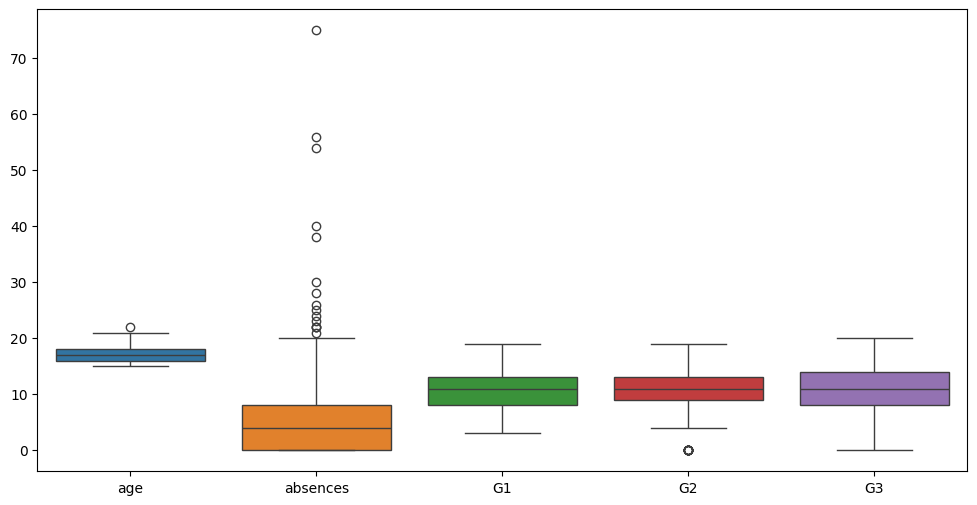

In [6]:
numeric_students = students.select_dtypes(include=np.number)
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_students)
plt.show()

In [7]:
students = students[students['absences'] < 20]
print(students.describe())

              age    absences          G1          G2          G3
count  376.000000  376.000000  376.000000  376.000000  376.000000
mean    16.659574    4.438830   10.901596   10.718085   10.409574
std      1.269567    4.731904    3.316769    3.782809    4.630601
min     15.000000    0.000000    3.000000    0.000000    0.000000
25%     16.000000    0.000000    8.000000    9.000000    8.000000
50%     17.000000    3.000000   11.000000   11.000000   11.000000
75%     18.000000    7.000000   13.000000   13.000000   14.000000
max     22.000000   19.000000   19.000000   19.000000   20.000000


In [8]:
print(students.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


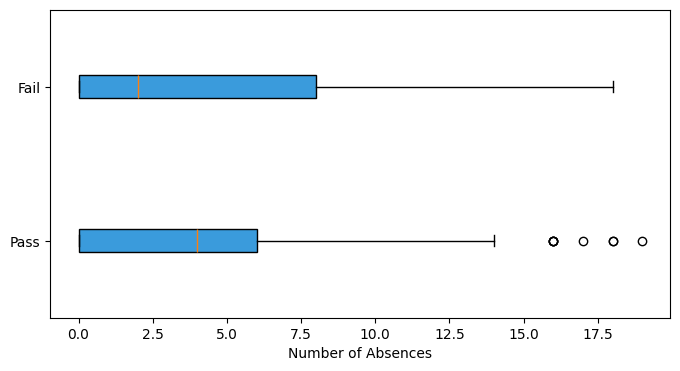

In [9]:
pass_students = students[students['G3'] >= 10]
fail_students = students[students['G3'] < 10]
plt.figure(figsize=(8, 4))
plt.boxplot([pass_students['absences'], fail_students['absences']], vert=False, labels=['Pass', 'Fail'], patch_artist=True, boxprops=dict(facecolor='#3A9BDC'))
plt.xlabel("Number of Absences")
plt.show()

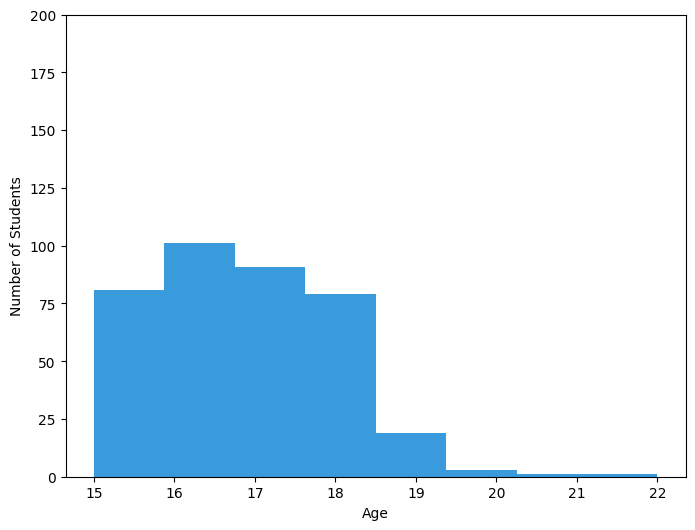

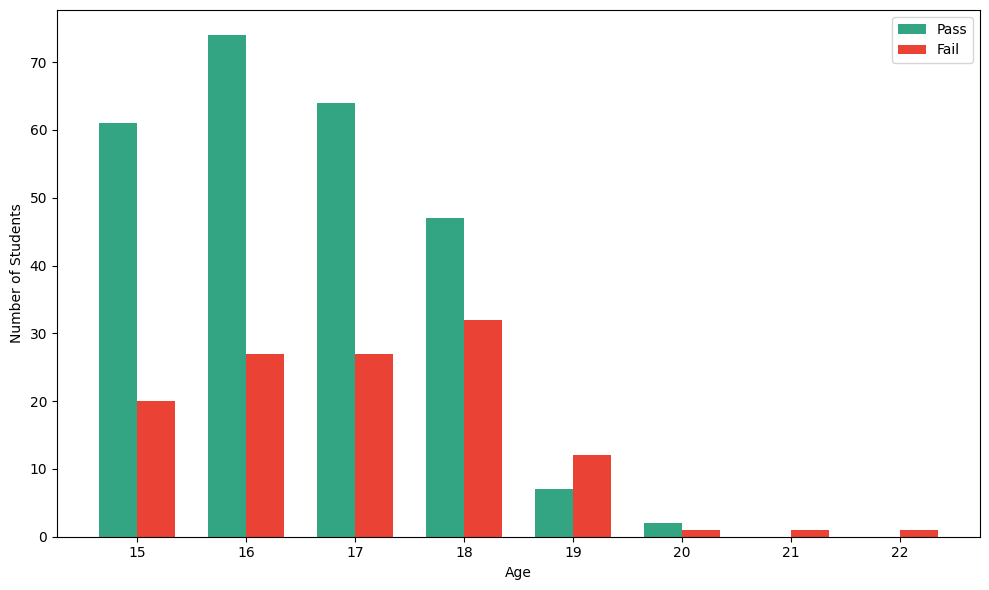

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(students['age'], bins=8, color='#3A9BDC')
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.ylim(0, 200)
plt.title(None)
plt.show()

pass_age = pass_students.groupby('age').size().reset_index(name='count')
fail_age = fail_students.groupby('age').size().reset_index(name='count')

pass_age = pd.concat([pass_age, pd.DataFrame({'age': [21, 22], 'count': [0, 0]})], ignore_index=True)
pass_age = pass_age.sort_values(by='age').reset_index(drop=True)

plot_age = pass_age.merge(fail_age, on='age', suffixes=('_pass', '_fail'), how='left').fillna(0)

labels = plot_age['age'].astype(str)
pass_counts = plot_age['count_pass']
fail_counts = plot_age['count_fail']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pass_counts, width, label='Pass', color='#34A583')
rects2 = ax.bar(x + width/2, fail_counts, width, label='Fail', color='#EA4335')

ax.set_ylabel('Number of Students')
ax.set_xlabel('Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

  studytime         G3
0         1  10.000000
1         2  10.155914
2         3  11.444444
3         4  11.259259


C:\Users\prana\AppData\Local\Temp\ipykernel_4500\3762316408.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_study = students.groupby('studytime')['G3'].mean().reset_index()


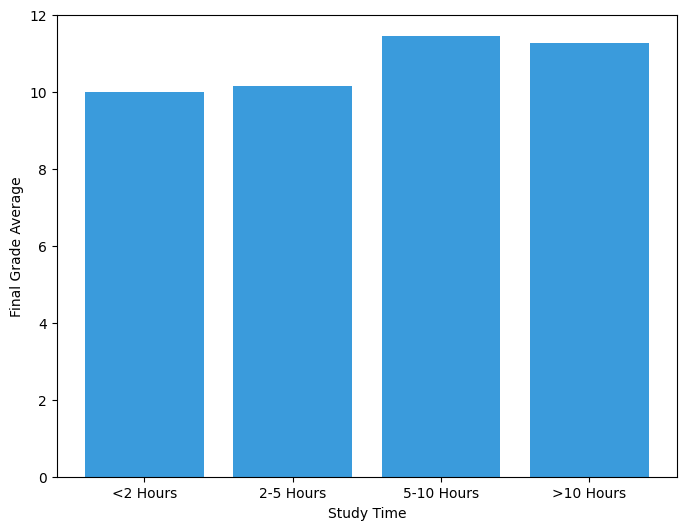

In [11]:
plot_study = students.groupby('studytime')['G3'].mean().reset_index()
print(plot_study)
plt.figure(figsize=(8, 6))
plt.bar(plot_study['studytime'].astype(str), plot_study['G3'], color='#3A9BDC')
plt.xticks(plot_study['studytime'].astype(str), ['<2 Hours', '2-5 Hours', '5-10 Hours', '>10 Hours'])
plt.xlabel("Study Time")
plt.ylabel("Final Grade Average")
plt.ylim(0, 12)
plt.show()

In [ ]:
plot_medu = students.groupby('Medu')['G3'].mean().reset_index()
print(plot_medu)

plot_fedu = students.groupby('Fedu')['G3'].mean().reset_index()
print(plot_fedu)

plot_parent = plot_fedu.merge(plot_medu, on='Fedu', suffixes=('_fedu', '_medu'), how='inner')

labels = ['primary', '5th to 9th grade', 'secondary', 'higher education']
father_grades = plot_parent['G3_fedu'].iloc[1:]
mother_grades = plot_parent['G3_medu'].iloc[1:]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, father_grades, width, label='Father', color='#3A9BDC')
rects2 = ax.bar(x + width/2, mother_grades, width, label='Mother', color='violetred')

ax.set_ylabel('Final Grade Average')
ax.set_xlabel('Parents Education')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 14)
ax.legend(loc='upper left')
fig.tight_layout()
plt.show()

  schoolsup famsup         G3
0        no     no  10.731343
1        no    yes  10.424870
2       yes     no  10.538462
3       yes    yes   9.083333


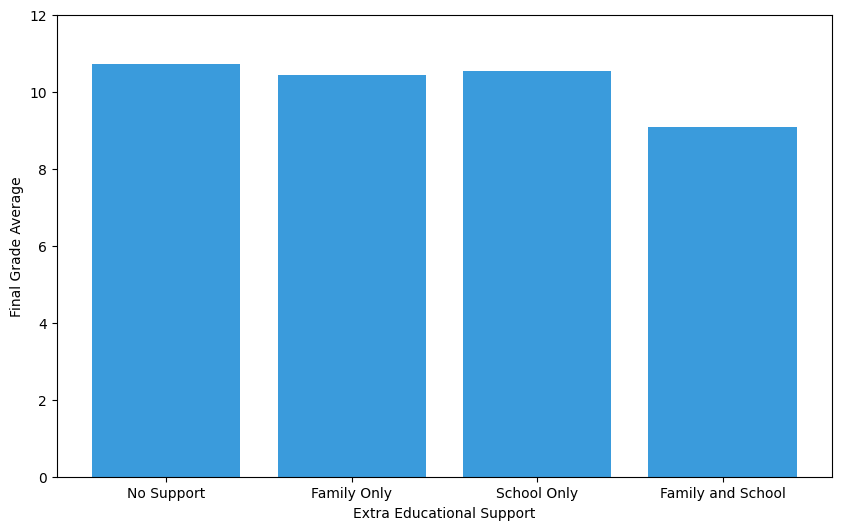

In [13]:
plot_schoolsup = students.groupby(['schoolsup', 'famsup'])['G3'].mean().reset_index()
print(plot_schoolsup)

labels = ["No Support", "Family Only", "School Only", "Family and School"]
grades = plot_schoolsup['G3']

plt.figure(figsize=(10, 6))
plt.bar(labels, grades, color='#3A9BDC')
plt.xlabel("Extra Educational Support")
plt.ylabel("Final Grade Average")
plt.ylim(0, 12)
plt.show()

  internet         G3
0       no   9.409091
1      yes  10.622581


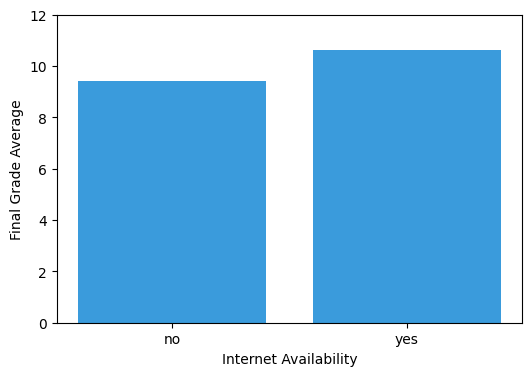

In [14]:
plot_internet = students.groupby('internet')['G3'].mean().reset_index()
print(plot_internet)

plt.figure(figsize=(6, 4))
plt.bar(plot_internet['internet'], plot_internet['G3'], color='#3A9BDC')
plt.xlabel("Internet Availability")
plt.ylabel("Final Grade Average")
plt.ylim(0, 12)
plt.show()

  romantic         G3
0       no  10.844961
1      yes   9.457627


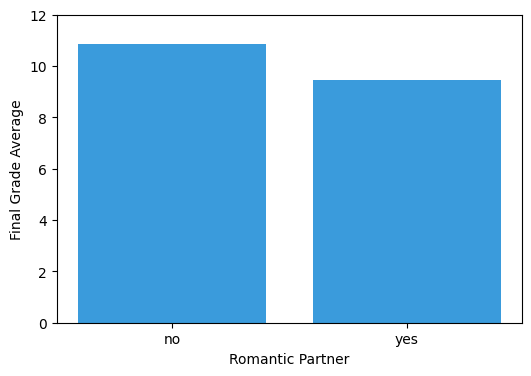

In [15]:
plot_romantic = students.groupby('romantic')['G3'].mean().reset_index()
print(plot_romantic)

plt.figure(figsize=(6, 4))
plt.bar(plot_romantic['romantic'], plot_romantic['G3'], color='#3A9BDC')
plt.xlabel("Romantic Partner")
plt.ylabel("Final Grade Average")
plt.ylim(0, 12)
plt.show()

  Dalc         G3
0    1  10.722433
1    2   9.214286
2    3  10.560000
3    4   9.888889
4    5  10.666667


C:\Users\prana\AppData\Local\Temp\ipykernel_4500\3108337670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_alcohol = students.groupby('Dalc')['G3'].mean().reset_index()


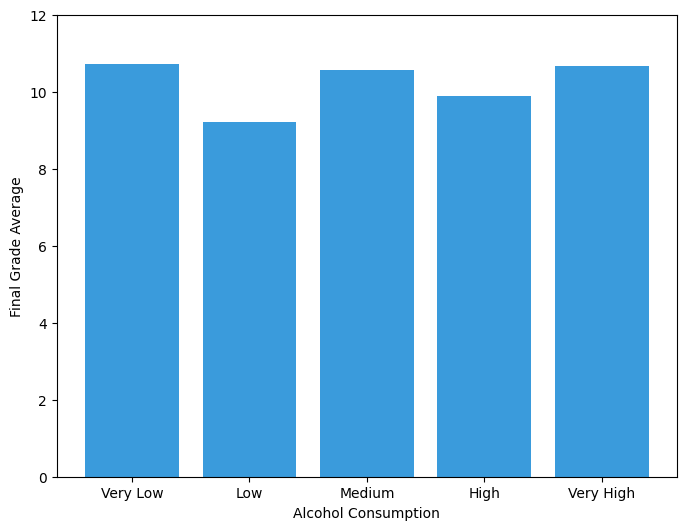

In [16]:
plot_alcohol = students.groupby('Dalc')['G3'].mean().reset_index()
print(plot_alcohol)

plt.figure(figsize=(8, 6))
plt.bar(plot_alcohol['Dalc'].astype(str), plot_alcohol['G3'], color='#3A9BDC')
plt.xticks(plot_alcohol['Dalc'].astype(str), ["Very Low", "Low", "Medium", "High", "Very High"])
plt.xlabel("Alcohol Consumption")
plt.ylabel("Final Grade Average")
plt.ylim(0, 12)
plt.show()

  health         G3
0      1  12.159091
1      2   9.878049
2      3   9.965517
3      4  10.138462
4      5  10.417266


C:\Users\prana\AppData\Local\Temp\ipykernel_4500\2018079265.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_health = students.groupby('health')['G3'].mean().reset_index()


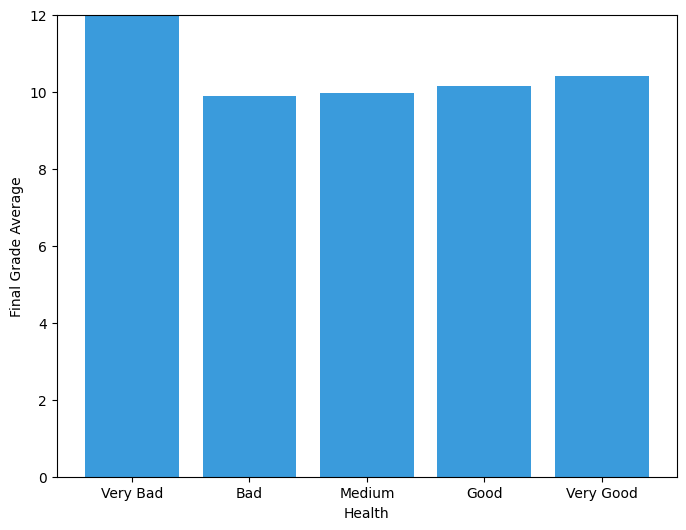

In [17]:
plot_health = students.groupby('health')['G3'].mean().reset_index()
print(plot_health)

plt.figure(figsize=(8, 6))
plt.bar(plot_health['health'].astype(str), plot_health['G3'], color='#3A9BDC')
plt.xticks(plot_health['health'].astype(str), ["Very Bad", "Bad", "Medium", "Good", "Very Good"])
plt.xlabel("Health")
plt.ylabel("Final Grade Average")
plt.ylim(0, 12)
plt.show()

       age  absences   G1   G2   G3
count  0.0       0.0  0.0  0.0  0.0
mean   NaN       NaN  NaN  NaN  NaN
std    NaN       NaN  NaN  NaN  NaN
min    NaN       NaN  NaN  NaN  NaN
25%    NaN       NaN  NaN  NaN  NaN
50%    NaN       NaN  NaN  NaN  NaN
75%    NaN       NaN  NaN  NaN  NaN
max    NaN       NaN  NaN  NaN  NaN


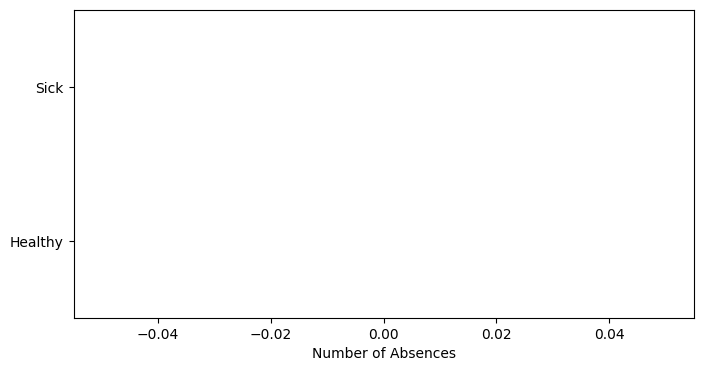

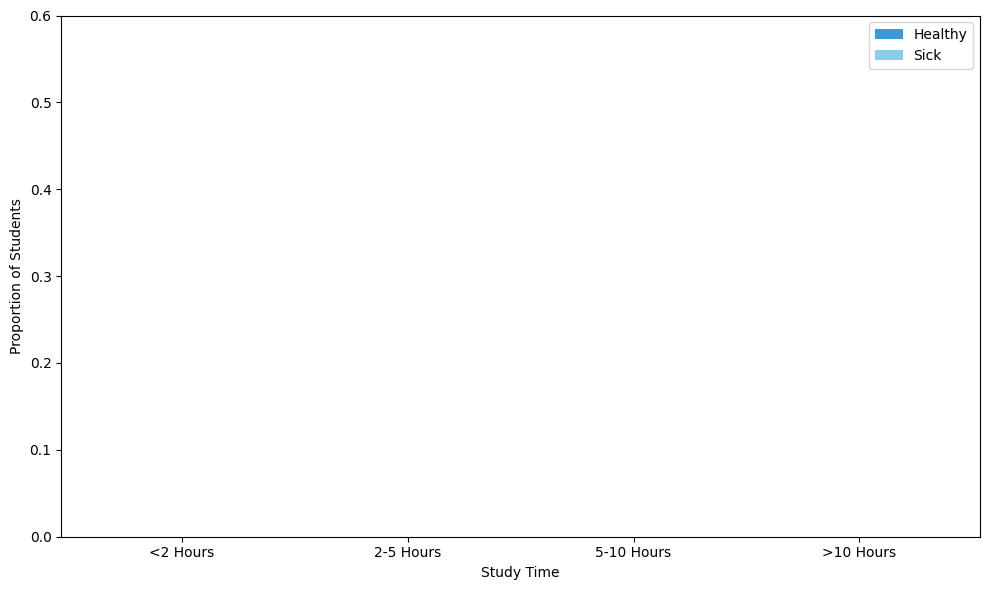

In [18]:
sick_students = students[students['health'] == '1']
healthy_students = students[students['health'].isin(['3', '4', '5'])]

print(sick_students.describe())

plt.figure(figsize=(8, 4))
plt.boxplot([healthy_students['absences'], sick_students['absences']], vert=False, labels=['Healthy', 'Sick'], patch_artist=True, boxprops=dict(facecolor='#3A9BDC'))
plt.xlabel("Number of Absences")
plt.show()

studyhealth_healthy_prop = healthy_students['studytime'].value_counts(normalize=True).sort_index()
studyhealth_sick_prop = sick_students['studytime'].value_counts(normalize=True).sort_index()

studyhealth_prop_df = pd.DataFrame({'Healthy': studyhealth_healthy_prop, 'Sick': studyhealth_sick_prop}).fillna(0)

labels = ['<2 Hours', '2-5 Hours', '5-10 Hours', '>10 Hours']
healthy_freq = studyhealth_prop_df['Healthy'].values
sick_freq = studyhealth_prop_df['Sick'].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, healthy_freq, width, label='Healthy', color='#3A9BDC')
rects2 = ax.bar(x + width/2, sick_freq, width, label='Sick', color='skyblue')

ax.set_ylabel('Proportion of Students')
ax.set_xlabel('Study Time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 0.6)
ax.legend()
fig.tight_layout()
plt.show()

In [19]:
students['status'] = np.where(students['G3'] >= 10, "Pass", "Fail")
students['status'] = students['status'].astype('category')
students = students.drop(columns=['G3'])
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      376 non-null    object  
 1   sex         376 non-null    object  
 2   age         376 non-null    int64   
 3   address     376 non-null    object  
 4   famsize     376 non-null    object  
 5   Pstatus     376 non-null    object  
 6   Medu        376 non-null    category
 7   Fedu        376 non-null    category
 8   Mjob        376 non-null    object  
 9   Fjob        376 non-null    object  
 10  reason      376 non-null    object  
 11  guardian    376 non-null    object  
 12  traveltime  376 non-null    category
 13  studytime   376 non-null    category
 14  failures    376 non-null    category
 15  schoolsup   376 non-null    object  
 16  famsup      376 non-null    object  
 17  paid        376 non-null    object  
 18  activities  376 non-null    object  
 19  nursery     3

In [20]:
np.random.seed(1)
index = np.random.choice(students.index, size=int(0.8 * len(students)), replace=False)
students_train = students.loc[index]
students_test = students.drop(index)

In [21]:
print(students_train['status'].value_counts(normalize=True))

status
Pass    0.683333
Fail    0.316667
Name: proportion, dtype: float64


In [22]:
le = LabelEncoder()
students_train['status_encoded'] = le.fit_transform(students_train['status'])

X_train = students_train.drop(columns=['status', 'status_encoded'])
y_train = students_train['status_encoded']

X_train_encoded = pd.get_dummies(X_train, drop_first=True)

smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

students_train_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train_encoded.columns), pd.Series(le.inverse_transform(y_train_resampled), name='status')], axis=1)

print(students_train_resampled['status'].value_counts(normalize=True))

status
Pass    0.5
Fail    0.5
Name: proportion, dtype: float64


In [23]:
X_train_resampled = students_train_resampled.drop(columns=['status'])
y_train_resampled = students_train_resampled['status']
model_bayes = GaussianNB()
model_bayes.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [24]:
model_dtree = DecisionTreeClassifier()
X_train_resampled = pd.get_dummies(students_train_resampled.drop(columns=['status']), drop_first=True)
y_train_resampled = students_train_resampled['status']
model_dtree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [25]:
np.random.seed(1)
ctrl = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model_rf = RandomForestClassifier(random_state=1)
scores = cross_val_score(model_rf, X_train_resampled, y_train_resampled, cv=ctrl)
print(f"Mean cross-validation accuracy: {np.mean(scores):.4f}")
model_rf.fit(X_train_resampled, y_train_resampled)

Mean cross-validation accuracy: 0.9333


RandomForestClassifier(random_state=1)

Training Confusion Matrix (Naive Bayes):
 [[181  24]
 [ 37 168]]
Training Accuracy (Naive Bayes): 0.8512
Testing Confusion Matrix (Naive Bayes):
 [[40 10]
 [ 9 17]]
Testing Accuracy (Naive Bayes): 0.7500


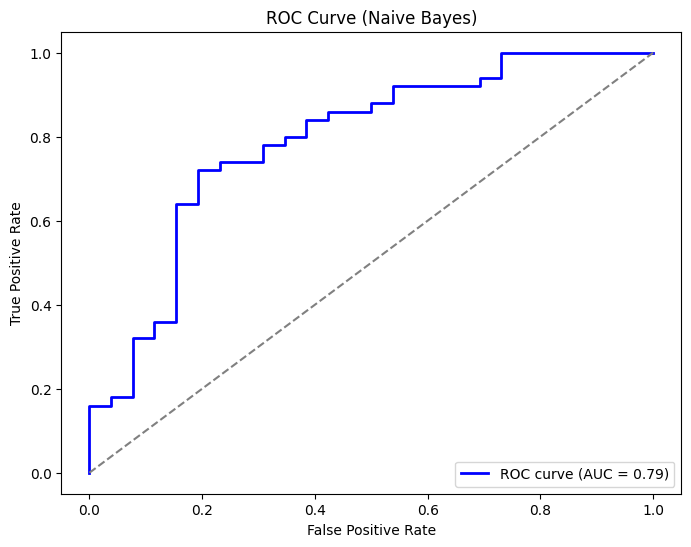

AUC (Naive Bayes): 0.7885


In [26]:
predict_bayes_train = model_bayes.predict(X_train_resampled)
cm_train = confusion_matrix(y_train_resampled, predict_bayes_train, labels=['Pass', 'Fail'])
print("Training Confusion Matrix (Naive Bayes):\n", cm_train)

accuracy_train = accuracy_score(y_train_resampled, predict_bayes_train)
print(f"Training Accuracy (Naive Bayes): {accuracy_train:.4f}")

X_test = students_test.drop(columns=['status'])
y_test = students_test['status']
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

missing_cols = set(X_train_resampled.columns) - set(X_test_encoded.columns)
for c in missing_cols:
    X_test_encoded[c] = 0
X_test_encoded = X_test_encoded[X_train_resampled.columns]

predict_bayes_test = model_bayes.predict(X_test_encoded)
cm_test = confusion_matrix(y_test, predict_bayes_test, labels=['Pass', 'Fail'])
print("Testing Confusion Matrix (Naive Bayes):\n", cm_test)

accuracy_test = accuracy_score(y_test, predict_bayes_test)
print(f"Testing Accuracy (Naive Bayes): {accuracy_test:.4f}")

prob_bayes_test = model_bayes.predict_proba(X_test_encoded)

fpr_bayes, tpr_bayes, thresholds_bayes = roc_curve(y_test, prob_bayes_test[:, 1], pos_label='Pass')
auc_bayes = auc(fpr_bayes, tpr_bayes)

plt.figure(figsize=(8, 6))
plt.plot(fpr_bayes, tpr_bayes, color='blue', lw=2, label=f'ROC curve (AUC = {auc_bayes:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC (Naive Bayes): {auc_bayes:.4f}")

In [27]:
X_train_dtree = pd.get_dummies(students_train.drop(columns=['status']), drop_first=True)
y_train_dtree = students_train['status']
model_dtree_train = DecisionTreeClassifier()
model_dtree_train.fit(X_train_dtree, y_train_dtree)
predict_dtree_train = model_dtree_train.predict(X_train_dtree)
cm_train_dtree = confusion_matrix(y_train_dtree, predict_dtree_train, labels=['Pass', 'Fail'])
print("Training Confusion Matrix (Decision Tree):\n", cm_train_dtree)
accuracy_train_dtree = accuracy_score(y_train_dtree, predict_dtree_train)
print(f"Training Accuracy (Decision Tree): {accuracy_train_dtree:.4f}")

Training Confusion Matrix (Decision Tree):
 [[205   0]
 [  0  95]]
Training Accuracy (Decision Tree): 1.0000


In [28]:
X_test_dtree = students_test.drop(columns=['status'])
y_test_dtree = students_test['status']
X_test_dtree_encoded = pd.get_dummies(X_test_dtree, drop_first=True)

missing_cols_dtree = set(X_train_dtree.columns) - set(X_test_dtree_encoded.columns)
for c in missing_cols_dtree:
    X_test_dtree_encoded[c] = 0
X_test_dtree_encoded = X_test_dtree_encoded[X_train_dtree.columns]

predict_dtree_test = model_dtree_train.predict(X_test_dtree_encoded)
cm_test_dtree = confusion_matrix(y_test_dtree, predict_dtree_test, labels=['Pass', 'Fail'])
print("Testing Confusion Matrix (Decision Tree):\n", cm_test_dtree)
accuracy_test_dtree = accuracy_score(y_test_dtree, predict_dtree_test)
print(f"Testing Accuracy (Decision Tree): {accuracy_test_dtree:.4f}")

Testing Confusion Matrix (Decision Tree):
 [[ 0 50]
 [ 0 26]]
Testing Accuracy (Decision Tree): 0.3421


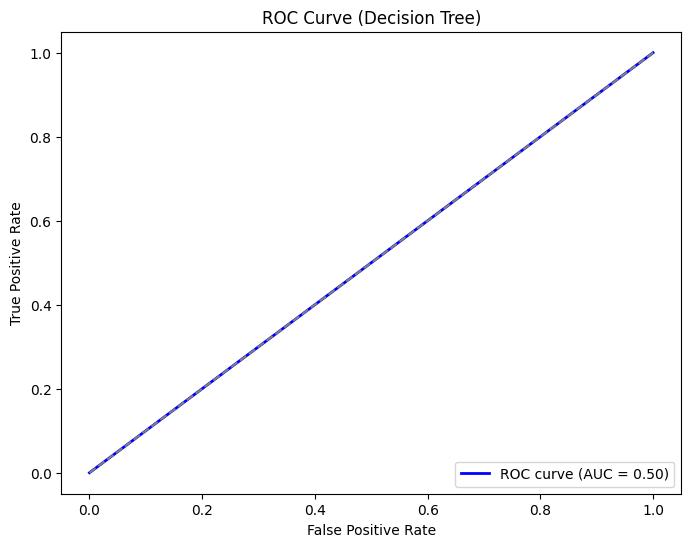

In [29]:
prob_dtree_test = model_dtree_train.predict_proba(X_test_dtree_encoded)
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test_dtree, prob_dtree_test[:, 1], pos_label='Pass')
auc_dtree = auc(fpr_dtree, tpr_dtree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dtree, tpr_dtree, color='blue', lw=2, label=f'ROC curve (AUC = {auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

In [30]:
print(f"AUC (Decision Tree): {auc_dtree:.4f}")

AUC (Decision Tree): 0.5000


In [31]:
X_train_rf = pd.get_dummies(students_train.drop(columns=['status']), drop_first=True)
y_train_rf = students_train['status']
model_rf_train = RandomForestClassifier(random_state=1)
model_rf_train.fit(X_train_rf, y_train_rf)
predict_rf_train = model_rf_train.predict(X_train_rf)
cm_train_rf = confusion_matrix(y_train_rf, predict_rf_train, labels=['Pass', 'Fail'])
print("Training Confusion Matrix (Random Forest):\n", cm_train_rf)
accuracy_train_rf = accuracy_score(y_train_rf, predict_rf_train)
print(f"Training Accuracy (Random Forest): {accuracy_train_rf:.4f}")

Training Confusion Matrix (Random Forest):
 [[205   0]
 [  0  95]]
Training Accuracy (Random Forest): 1.0000


In [32]:
X_test_rf = students_test.drop(columns=['status'])
y_test_rf = students_test['status']
X_test_rf_encoded = pd.get_dummies(X_test_rf, drop_first=True)

missing_cols_rf = set(X_train_rf.columns) - set(X_test_rf_encoded.columns)
for c in missing_cols_rf:
    X_test_rf_encoded[c] = 0
X_test_rf_encoded = X_test_rf_encoded[X_train_rf.columns]

predict_rf_test = model_rf_train.predict(X_test_rf_encoded)
cm_test_rf = confusion_matrix(y_test_rf, predict_rf_test, labels=['Pass', 'Fail'])
print("Testing Confusion Matrix (Random Forest):\n", cm_test_rf)
accuracy_test_rf = accuracy_score(y_test_rf, predict_rf_test)
print(f"Testing Accuracy (Random Forest): {accuracy_test_rf:.4f}")

Testing Confusion Matrix (Random Forest):
 [[28 22]
 [ 0 26]]
Testing Accuracy (Random Forest): 0.7105


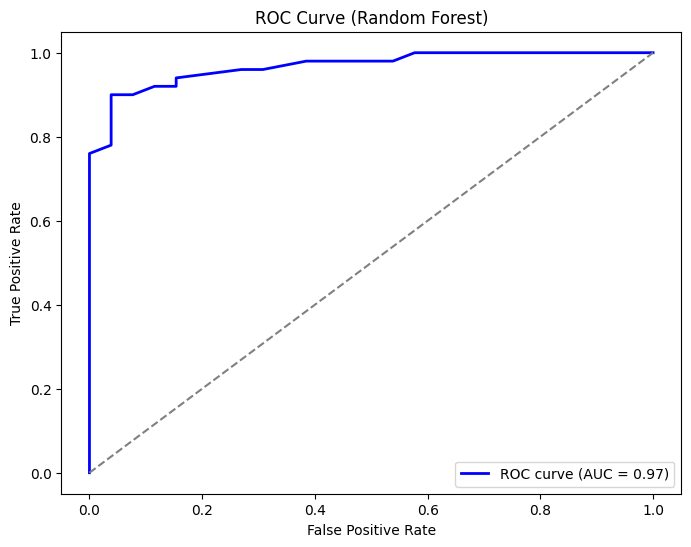

In [33]:
prob_rf_test = model_rf_train.predict_proba(X_test_rf_encoded)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, prob_rf_test[:, 1], pos_label='Pass')
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [34]:
print(f"AUC (Random Forest): {auc_rf:.4f}")

AUC (Random Forest): 0.9677
